In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
del_time=pd.read_csv('delivery_time.csv')

In [3]:
del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# 1.Initial investigation

In [4]:
del_time.shape

(21, 2)

In [6]:
del_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
del_time.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [8]:
del_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# 2. Assumption Check

Text(0, 0.5, 'Delivery time')

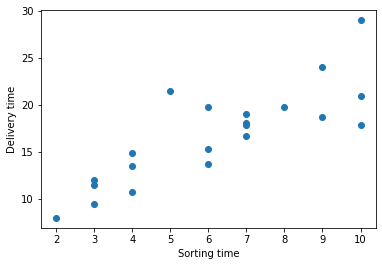

In [12]:
plt.scatter(x='Sorting Time',y='Delivery Time', data=del_time)
plt.xlabel('Sorting time')
plt.ylabel('Delivery time')

In [13]:
del_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [14]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

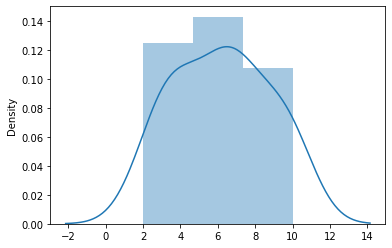

In [15]:
sns.distplot(x=del_time['Sorting Time'])

<AxesSubplot:ylabel='Density'>

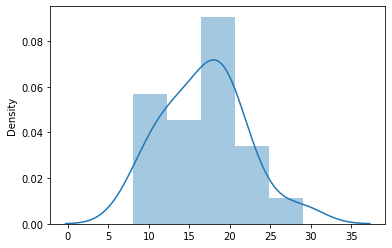

In [16]:
sns.distplot(x=del_time['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

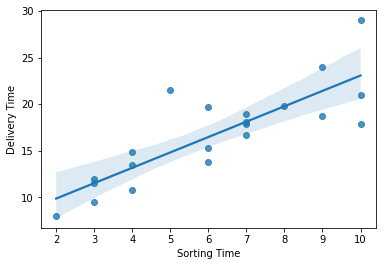

In [17]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=del_time)

# 4.Model Building

In [18]:
import statsmodels.formula.api as smf

In [19]:
xvar=del_time[['Sorting Time']]
yvar=del_time[['Delivery Time']]

In [22]:
model=smf.ols('yvar~xvar',data=del_time).fit()

In [23]:
model.params

Intercept    6.582734
xvar         1.649020
dtype: float64

# 5.Model evaluation

In [24]:
y_pred=model.predict(xvar)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error:",mean_squared_error(yvar,y_pred))
print('R2 score is:',r2_score(yvar,y_pred))

Mean squared error: 7.793311548584062
R2 score is: 0.6822714748417231


Inference

For a better model, the mean sqaure value should be close to zero, and R2 score should be close to 1